In [3]:
from sklearn import tree
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

In [4]:
from IPython.display import SVG 
from graphviz import Source
from IPython.display import display

In [5]:
titanic_data = pd.read_csv('train.csv')

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived 

In [9]:
X = pd.get_dummies(X)

In [10]:
X = X.fillna({'Age': X.Age.median()})

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

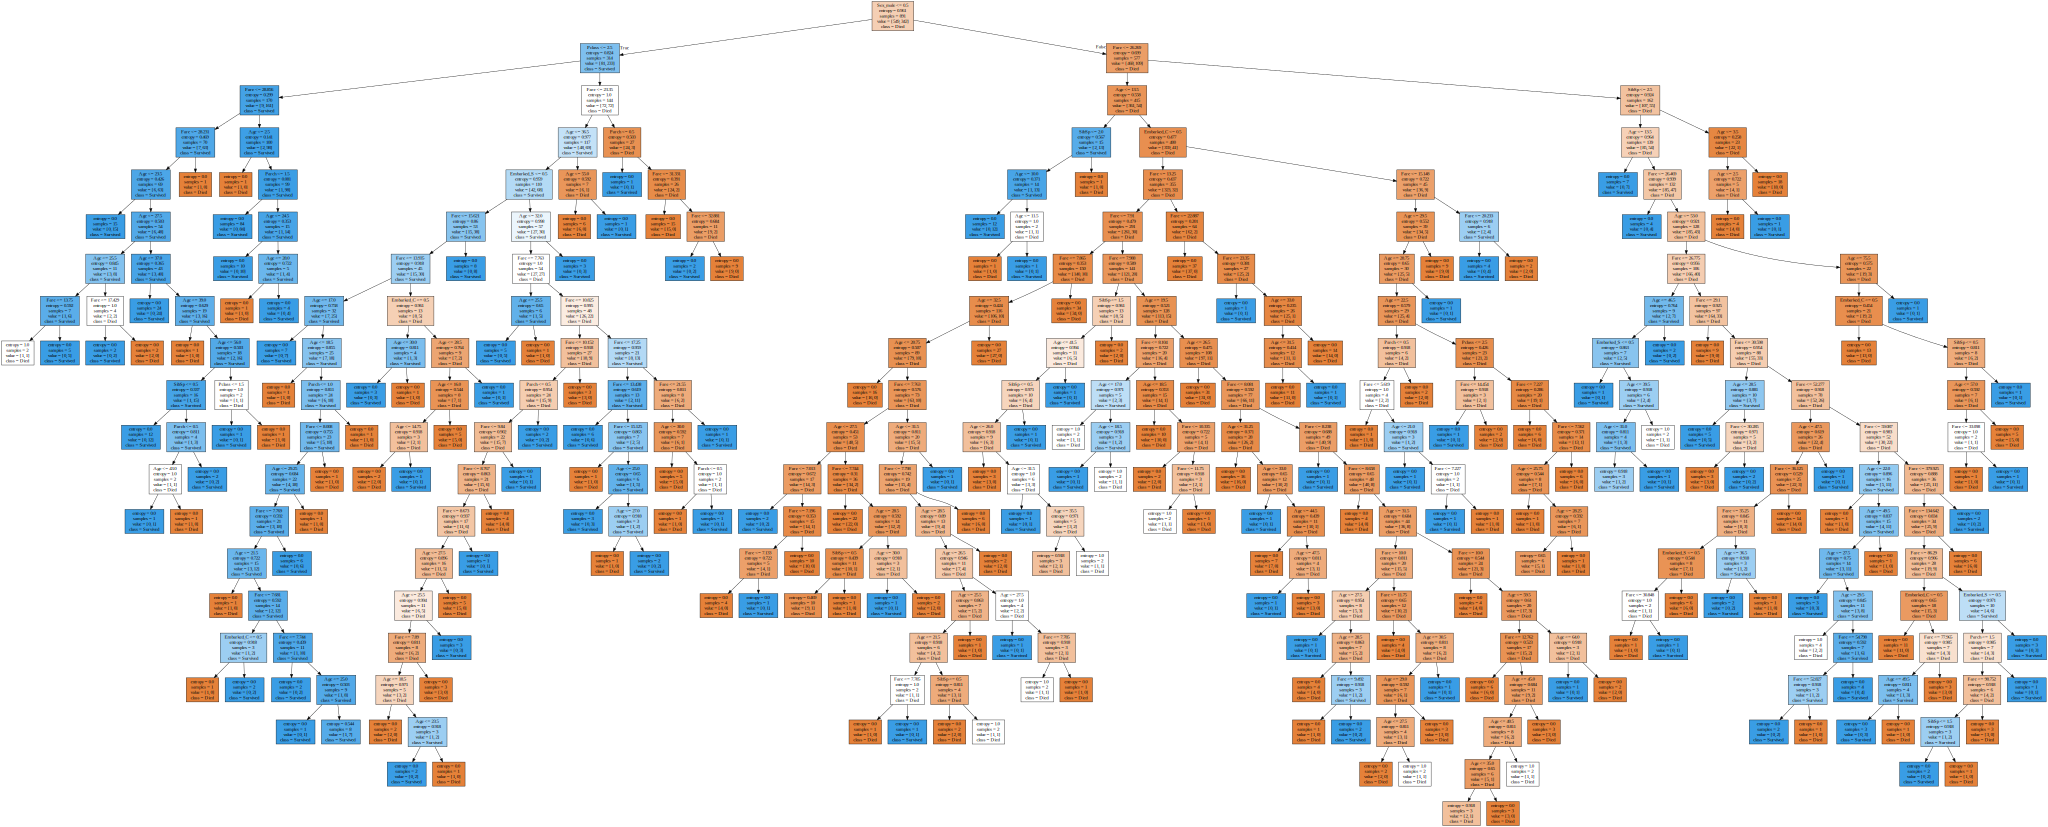

In [13]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
clf.score(X, y)

0.9797979797979798

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
clf.score(X_train, y_train)

0.9798657718120806

In [23]:
clf.fit(X_test, y_test)

DecisionTreeClassifier(criterion='entropy')

In [24]:
clf.score(X_test, y_test)

1.0